## Ejercicios

#### Pablo Daniel Vargas Cardenas A003444869


### Ejercicio 1 de filtros
#### 1. Gaussiano 2. Binomial 3. Promedio

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, gaussian_filter

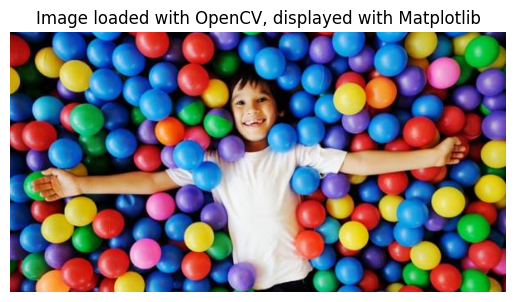

In [31]:
#imagen a leer
original_img = cv2.imread("/Users/pablovargas/Documents/MachineLearningProblems/pelotas.jpg")

# Convert BGR to RGB
img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Show the image with Matplotlib
plt.imshow(img_rgb)
plt.title('Image loaded with OpenCV, displayed with Matplotlib')
plt.axis('off')
plt.show()

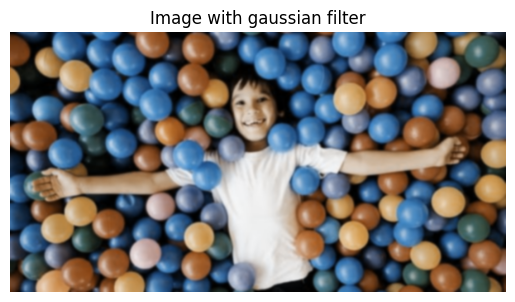

In [32]:
#Gaussiano
def gaussian_kernel(size=3, sigma=1):
    """Genera un kernel gaussiano 2D normalizado."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)


# Crear y aplicar filtro Gaussiano
#gauss_kernel = gaussian_kernel(size=3, sigma=1)
gaussian_img = gaussian_filter(img_rgb, sigma=1)  # puedes ajustar sigma para más o menos desenfoque
#gaussian_img = convolve(img_rgb, gauss_kernel)

# Show the image with Matplotlib
plt.imshow(gaussian_img)
plt.title('Image with gaussian filter')
plt.axis('off')
plt.show()


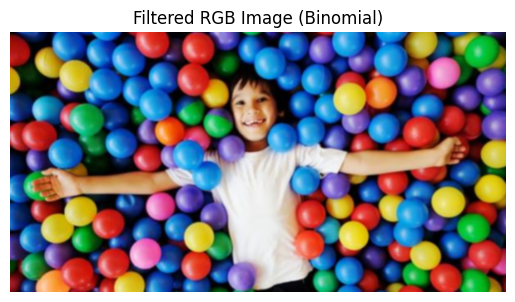

In [36]:
# Filtro Binomial (kernel 3x3 típico)
binomial_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16.0

# Apply convolution to each channel separately
filtered = np.zeros_like(img_rgb)
for c in range(3):  # RGB channels
    filtered[:, :, c] = convolve(img_rgb[:, :, c], binomial_kernel)

# Show the filtered image
plt.imshow(filtered)
plt.title("Filtered RGB Image (Binomial)")
plt.axis('off')
plt.show()

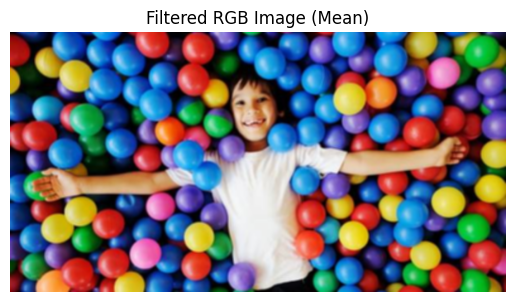

In [ ]:
# Filtro de Promedio (media)
mean_kernel = np.ones((3, 3)) / 9.0

# Apply convolution to each channel separately
filtered = np.zeros_like(img_rgb)
for c in range(3):  # RGB channels
    filtered[:, :, c] = convolve(img_rgb[:, :, c], mean_kernel)

# Show the filtered image
plt.imshow(filtered)
plt.title("Filtered RGB Image (Mean)")
plt.axis('off')
plt.show()

## Ejercicio 2

### Convertir de RGB a HSL 

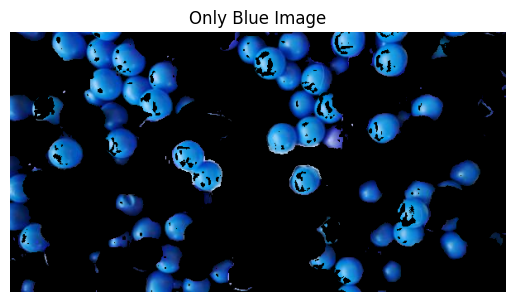

In [42]:
def keep_only_blue(img_rgb):
    # Convert RGB to HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Define blue color range in HSV
    lower_blue = np.array([100, 50, 50])  # H, S, V
    upper_blue = np.array([120, 255, 255])

    # Create a mask for blue areas
    mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

    # Apply mask to original image
    blue_only = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

    return blue_only

only_blue_img = keep_only_blue(img_rgb)
plt.imshow(only_blue_img)
plt.title("Only Blue Image")
plt.axis('off')
plt.show()


### Ejercicio 3

### Dowsncale with gaussian filter

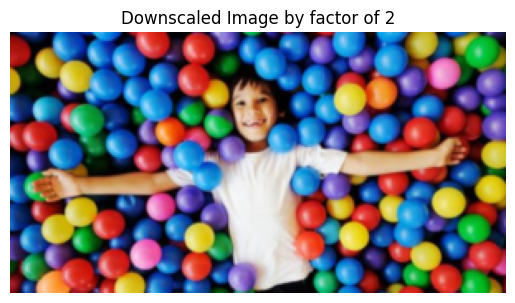

Original image size
(315, 600, 3)
Downscaled Size
(158, 300, 3)


In [47]:
def gaussian_downscale(img_rgb, sigma=1):
    """
    Downscale an RGB image using a Gaussian filter.

    Parameters:
        img_rgb (ndarray): Input image in RGB format.
        sigma (float): Standard deviation for Gaussian blur.

    Returns:
        downscaled_img (ndarray): Downscaled image.
    """
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(img_rgb, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Downsample by taking every second pixel (factor of 2)
    downscaled_img = blurred[::2, ::2]

    return downscaled_img

gaussian_downscale_image = gaussian_downscale(img_rgb)
plt.imshow(gaussian_downscale_image)
plt.title("Downscaled Image by factor of 2")
plt.axis('off')
plt.show()

print("Original image size")
print(img_rgb.shape)
print("Downscaled Size")
print(gaussian_downscale_image.shape)